In [145]:
import pandas as pd

df_nodes = pd.read_csv("../Java/resources/nodes_real.csv", sep="\t")
df_nodes.drop(columns=["label", "Id", "timeset", "betweenesscentrality"], inplace=True)
df_nodes.rename(columns={"id" : "Spotify ID"}, inplace=True)
df_nodes

,eigencentrality,1,0,2,3,eccentricity,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0,0,0.0,0,0.000000,0.0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0,0,0.0,1,0.000000,0.0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,2,1,1.0,3583,0.750000,8.0
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,3,3,1.0,4549,0.165762,6.0
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0,0,0.0,2,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0,0,0.0,4748,0.000000,0.0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0,0,0.0,4749,0.000000,0.0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0,0,0.0,4750,0.000000,0.0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,1.000000,10aVNpUB6sPjYjunSIIeq5,2,1,1.0,4751,1.000000,4.0


In [146]:
# Define dictionaries for id and title attributes
id_dict = {
    "0": "name",
    "1": "popularity",
    "2": "followers",
    "3": "genres"
}

In [147]:
df_nodes.rename(columns=id_dict, inplace=True)
#df_nodes.sort_values(by="Spotify ID", inplace=True)
df_nodes

,eigencentrality,popularity,name,followers,genres,eccentricity,harmonicclosnesscentrality,Spotify ID,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.000000,2Mhi3jfuRSdbVZPdjqsnnN,0,0,0.0,0,0.000000,0.0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.000000,4QFbv1d0BbQANO95hIQaZl,0,0,0.0,1,0.000000,0.0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.833333,4Omy5P9r7PiXYje9h4jMkz,2,1,1.0,3583,0.750000,8.0
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.180073,5vZr4eKCIxujg3mPZaHGcS,3,3,1.0,4549,0.165762,6.0
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.000000,1TYZpmNJCpmN38laFCVkCm,0,0,0.0,2,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.000000,5QEZ8qPZSxIvzrkJCxlsn7,0,0,0.0,4748,0.000000,0.0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.000000,7HBA3bLuJTLRvjK8NX9ZSy,0,0,0.0,4749,0.000000,0.0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.000000,67ISVBZzcCTTKM17Ps00sx,0,0,0.0,4750,0.000000,0.0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,1.000000,10aVNpUB6sPjYjunSIIeq5,2,1,1.0,4751,1.000000,4.0


In [148]:
df_edges = pd.read_csv("../Java/resources/edges_real.csv", sep="\t")
df_edges

,Source,Target,Type,Weight,9,id,8,11,label,10,6,7,weight,timeset,5,4
0,4Omy5P9r7PiXYje9h4jMkz,0EvRNpzBThmcwE94F4nokW,0,4.0,23,0,False,day,NaN,1987-01-01,019LymYgh7wHQaInMdZd0Z,Feelings Of Forever,4.0,NaN,Bill Smith,George Tobin
1,4Omy5P9r7PiXYje9h4jMkz,4C3uGP8vRDzxrhJxZiOjTe,0,4.0,23,1,False,day,NaN,1987-01-01,019LymYgh7wHQaInMdZd0Z,Feelings Of Forever,4.0,NaN,Tiffany,Bill Smith
2,5vZr4eKCIxujg3mPZaHGcS,0CSW4YWldpNnpaqYJJXSto,0,2.0,27,2,True,day,NaN,1999-03-23,5CNBjdmp5aZdW2Nu6f0Xav,Watch for the Hook (Dungeon Family Mix),2.0,NaN,Cool Breeze,Witchdoctor
3,5vZr4eKCIxujg3mPZaHGcS,1G9G7WwrXka3Z1r7aIDjI7,0,2.0,27,3,True,day,NaN,1999-03-23,5CNBjdmp5aZdW2Nu6f0Xav,Watch for the Hook (Dungeon Family Mix),2.0,NaN,OutKast,Cool Breeze
4,5vZr4eKCIxujg3mPZaHGcS,3F2Y683ovlWT53WKCeq0oj,0,2.0,27,4,True,day,NaN,1999-03-23,5CNBjdmp5aZdW2Nu6f0Xav,Watch for the Hook (Dungeon Family Mix),2.0,NaN,Goodie Mob,Cool Breeze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2Pb4hadLoPVsd759DuV9nT,2VWX6ZalDVTp1KMGN6JDSl,0,2.0,2,2181,False,day,NaN,2018-05-18,3pQ3F1CsMxRCRQCzagld9d,Sole Sole Sole,2.0,NaN,Siw Malmkvist,Arturo Casadei
2182,7sfl4Xt5KmfyDs2T3SVSMK,4pADjHPWyrlAF0FA7joK2H,0,2.0,63,2182,False,day,NaN,2009-01-01,7yws3pF3FFguwT2Psi6c15,Do You Remember,2.0,NaN,Lil Jon,Jay Sean
2183,08rMCq2ek1YjdDBsCPVH2s,7slfeZO9LsJbWgpkIoXBUJ,0,2.0,34,2183,False,day,NaN,2005-10-11,6zpyKdTIHTxwvJXbLb2UXV,I Don't Care (feat. Fat Joe & Amerie) - Englis...,2.0,NaN,Ricky Martin,Amerie
2184,5lKZWd6HiSCLfnDGrq9RAm,4xFUf1FHVy696Q1JQZMTRj,0,2.0,35,2184,False,day,NaN,2008-01-01,6wtcR8APXJAtPXb6LV96ia,JUST STAND UP!,2.0,NaN,Leona Lewis,Carrie Underwood


In [149]:
import networkx as nx
import pandas as pd


# Create a graph object
G = nx.Graph()

# Add nodes with attributes to the graph
for _, row in df_nodes.iterrows():
    node_attrs = {attr: row[attr] for attr in df_nodes.columns if attr != 'Spotify ID'}
    G.add_node(row['Spotify ID'], **node_attrs)

# Add edges with attributes to the graph
for _, row in df_edges.iterrows():
    edge_attrs = {attr: row[attr] for attr in df_edges.columns if attr not in ['Source', 'Target']}
    G.add_edge(row['Source'], row['Target'], **edge_attrs)

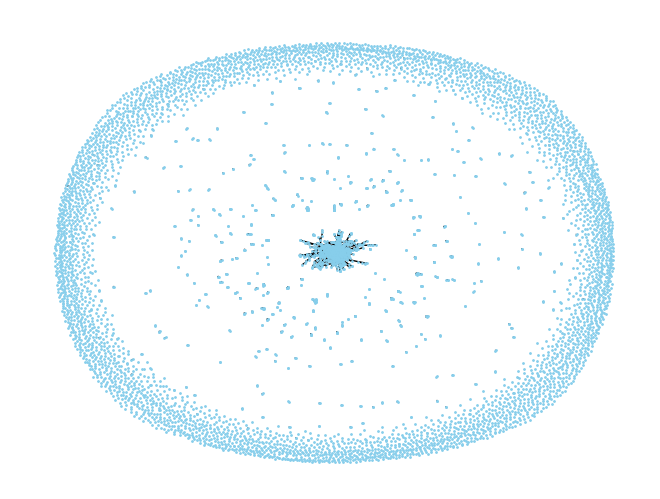

In [150]:
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=False, node_color='skyblue', node_size=1, edge_color='black', linewidths=1, font_size=15)

# Display the plot
plt.show()

In [151]:
import pandas as pd
import community
import networkx as nx

# Assuming G is your graph object containing nodes and edges

# Get all connected components
connected_components = nx.connected_components(G)

# Initialize dictionaries to store metrics for each node
degree = {}
weighted_degree = {}
eccentricity = {}
closeness_centrality = {}
harmonic_closeness_centrality = {}
betweenness_centrality = {}
modularity_class = {}
clustering = {}
eigenvector_centrality = {}

# For each connected component
for cc in connected_components:
    # Create a subgraph of G consisting only of this component
    Gc = G.subgraph(cc).copy()

    # Calculate metrics for this component
    betweenness_centrality.update(nx.betweenness_centrality(Gc))


# Assign metrics as node attributes in the original graph G
nx.set_node_attributes(G, betweenness_centrality, 'betweenesscentrality')

# Now your graph G has all the calculated metrics stored as node attributes

In [152]:
# Assuming G is your NetworkX graph

# Extract nodes and their attributes from the graph
nodes_with_attributes = [(G.nodes[node], node) for node in G.nodes()]

# Create a DataFrame from the nodes and their attributes
df_nodes = pd.DataFrame(nodes_with_attributes, columns=['Attributes', "Spotify ID"])

# Normalize the 'Attributes' column to expand it into separate columns
df_attributes = pd.json_normalize(df_nodes['Attributes'])

# Combine the original 'Node' column with the expanded attributes
df_nodes = pd.concat([df_attributes, df_nodes['Spotify ID'], ], axis=1)

# Display the DataFrame
df_nodes


,eigencentrality,popularity,name,followers,genres,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.000000,0,0,0.0,0,0.000000,0.0,0.0,2Mhi3jfuRSdbVZPdjqsnnN
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.000000,0,0,0.0,1,0.000000,0.0,0.0,4QFbv1d0BbQANO95hIQaZl
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.833333,2,1,1.0,3583,0.750000,8.0,0.0,4Omy5P9r7PiXYje9h4jMkz
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.180073,3,3,1.0,4549,0.165762,6.0,0.0,5vZr4eKCIxujg3mPZaHGcS
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.000000,0,0,0.0,2,0.000000,0.0,0.0,1TYZpmNJCpmN38laFCVkCm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.000000,0,0,0.0,4748,0.000000,0.0,0.0,5QEZ8qPZSxIvzrkJCxlsn7
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.000000,0,0,0.0,4749,0.000000,0.0,0.0,7HBA3bLuJTLRvjK8NX9ZSy
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.000000,0,0,0.0,4750,0.000000,0.0,0.0,67ISVBZzcCTTKM17Ps00sx
6022,0.002182,NaN,NaN,NaN,NaN,1.0,1.000000,2,1,1.0,4751,1.000000,4.0,0.0,10aVNpUB6sPjYjunSIIeq5


In [153]:
metrics_names = ['betweenesscentrality',
 'closnesscentrality',
 'clustering',
 'degree',
 'eccentricity',
 'eigencentrality',
 'weighted degree']

In [154]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_nodes is your DataFrame
# Select only the columns to be normalized
columns_to_normalize = metrics_names  # Exclude the first and last columns
data_to_normalize = df_nodes[columns_to_normalize]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data_to_normalize)

# Replace the original data with the normalized values
df_nodes_norm = df_nodes.copy()
df_nodes_norm[columns_to_normalize] = normalized_data

# Print the updated DataFrame
df_nodes_norm


,eigencentrality,popularity,name,followers,genres,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0000,0.000000,0.000000,0,0.0,0,0.000000,0.000000,0.0,2Mhi3jfuRSdbVZPdjqsnnN
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0000,0.000000,0.000000,0,0.0,1,0.000000,0.000000,0.0,4QFbv1d0BbQANO95hIQaZl
2,0.002715,35.0,Bill Smith,120.0,[],0.1250,0.833333,0.051282,1,1.0,3583,0.750000,0.065574,0.0,4Omy5P9r7PiXYje9h4jMkz
3,0.006510,20.0,Cool Breeze,3321.0,[],0.7500,0.180073,0.076923,3,1.0,4549,0.165762,0.049180,0.0,5vZr4eKCIxujg3mPZaHGcS
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0000,0.000000,0.000000,0,0.0,2,0.000000,0.000000,0.0,1TYZpmNJCpmN38laFCVkCm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0000,0.000000,0.000000,0,0.0,4748,0.000000,0.000000,0.0,5QEZ8qPZSxIvzrkJCxlsn7
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0000,0.000000,0.000000,0,0.0,4749,0.000000,0.000000,0.0,7HBA3bLuJTLRvjK8NX9ZSy
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0000,0.000000,0.000000,0,0.0,4750,0.000000,0.000000,0.0,67ISVBZzcCTTKM17Ps00sx
6022,0.002182,NaN,NaN,NaN,NaN,0.0625,1.000000,0.051282,1,1.0,4751,1.000000,0.032787,0.0,10aVNpUB6sPjYjunSIIeq5


1/10
2/10
3/10
4/10
5/10
6/10
7/10
8/10
9/10
10/10


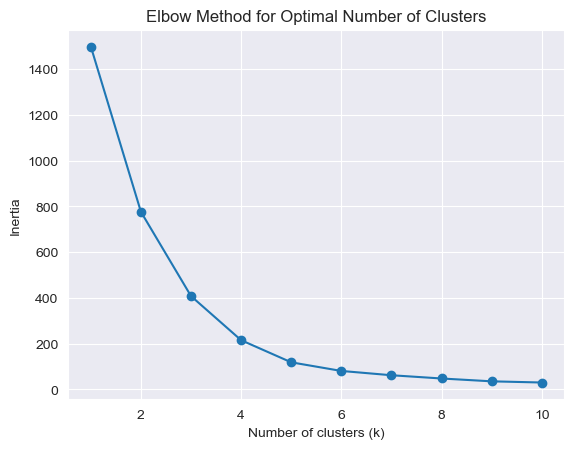

In [155]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

# Assuming df is your DataFrame with node attributes and edge attributes added

# Convert the DataFrame to a sparse adjacency matrix
#A_dense = pairwise_distances(df_nodes.drop(columns=['Node']), metric='euclidean')
A_dense = df_nodes_norm[metrics_names]

# Apply Louvain community detection algorithm to detect communities (if needed)
# You may need to find an alternative community detection algorithm for DataFrame-based graphs

# Calculate the modularity for different values of k
k_values = range(1, 11)  # Adjust the range as needed
inertias = []

amount_k = len(k_values)
for k in k_values:
    print(f'{k}/{amount_k}')
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [156]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(A_dense)
    score = silhouette_score(A_dense, kmeans.labels_)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because range starts from 2
print("Best number of clusters:", best_k)
silhouette_scores

Best number of clusters: 8


[0.7565613798312281,
 0.8428459609609672,
 0.8900359654448102,
 0.9155473936348201,
 0.9249845520911631,
 0.9290942391095675,
 0.9385875446227024,
 0.9320258061918816,
 0.9304468589631618]

In [198]:
from sklearn.cluster import KMeans

# Assuming df_nodes is your DataFrame containing node attributes

# Extract the features (attributes) from the DataFrame
X = df_nodes_norm[metrics_names]

# Specify the number of clusters (k)
#k = best_k  # Adjust as needed
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the DataFrame
df_nodes['Cluster'] = cluster_labels
df_nodes_norm['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
df_nodes


,eigencentrality,popularity,name,followers,genres,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID,Cluster
0,0.000000,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0.0,0.000000,0,0,0.0,0,0.000000,0.0,0.0,2Mhi3jfuRSdbVZPdjqsnnN,0
1,0.000000,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0.0,0.000000,0,0,0.0,1,0.000000,0.0,0.0,4QFbv1d0BbQANO95hIQaZl,0
2,0.002715,35.0,Bill Smith,120.0,[],2.0,0.833333,2,1,1.0,3583,0.750000,8.0,0.0,4Omy5P9r7PiXYje9h4jMkz,1
3,0.006510,20.0,Cool Breeze,3321.0,[],12.0,0.180073,3,3,1.0,4549,0.165762,6.0,0.0,5vZr4eKCIxujg3mPZaHGcS,2
4,0.000000,13.0,The Clique,449.0,['freakbeat'],0.0,0.000000,0,0,0.0,2,0.000000,0.0,0.0,1TYZpmNJCpmN38laFCVkCm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0.000000,10.0,Navy Gravy,209.0,[],0.0,0.000000,0,0,0.0,4748,0.000000,0.0,0.0,5QEZ8qPZSxIvzrkJCxlsn7,0
6020,0.000000,58.0,Sweet Little Band,20088.0,['musica para ninos'],0.0,0.000000,0,0,0.0,4749,0.000000,0.0,0.0,7HBA3bLuJTLRvjK8NX9ZSy,0
6021,0.000000,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0.0,0.000000,0,0,0.0,4750,0.000000,0.0,0.0,67ISVBZzcCTTKM17Ps00sx,0
6022,0.002182,NaN,NaN,NaN,NaN,1.0,1.000000,2,1,1.0,4751,1.000000,4.0,0.0,10aVNpUB6sPjYjunSIIeq5,1


In [199]:
# Assuming df_nodes is your DataFrame with cluster labels

# Calculate the cardinality of each cluster
cluster_cardinality = df_nodes_norm['Cluster'].value_counts()

# Display the cardinality of each cluster
print(cluster_cardinality)


Cluster
0    4379
1     939
2     706
Name: count, dtype: int64


## Additional Information and Metrics:


In [200]:
##Dimensional reduction:

import pandas as pd
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
# maybe include other normalized features like pop and foll????
columns = metrics_names.copy()    
columns.append("popularity")


# Omit the first and last columns
X = df_nodes_norm[metrics_names]

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(X)

# Convert the result to a DataFrame
df_2d = pd.DataFrame(X_2d, columns=['Component 1', 'Component 2'])

# Display the resulting DataFrame
df_2d["Spotify ID"] = df_nodes["Spotify ID"]
df_2d["Cluster"] = df_nodes["Cluster"]
df_2d

,Component 1,Component 2,Spotify ID,Cluster
0,-0.206675,-0.019184,2Mhi3jfuRSdbVZPdjqsnnN,0
1,-0.206675,-0.019184,4QFbv1d0BbQANO95hIQaZl,0
2,0.944250,0.260500,4Omy5P9r7PiXYje9h4jMkz,1
3,0.604335,0.944693,5vZr4eKCIxujg3mPZaHGcS,2
4,-0.206675,-0.019184,1TYZpmNJCpmN38laFCVkCm,0
...,...,...,...,...
6019,-0.206675,-0.019184,5QEZ8qPZSxIvzrkJCxlsn7,0
6020,-0.206675,-0.019184,7HBA3bLuJTLRvjK8NX9ZSy,0
6021,-0.206675,-0.019184,67ISVBZzcCTTKM17Ps00sx,0
6022,1.136536,0.090206,10aVNpUB6sPjYjunSIIeq5,1


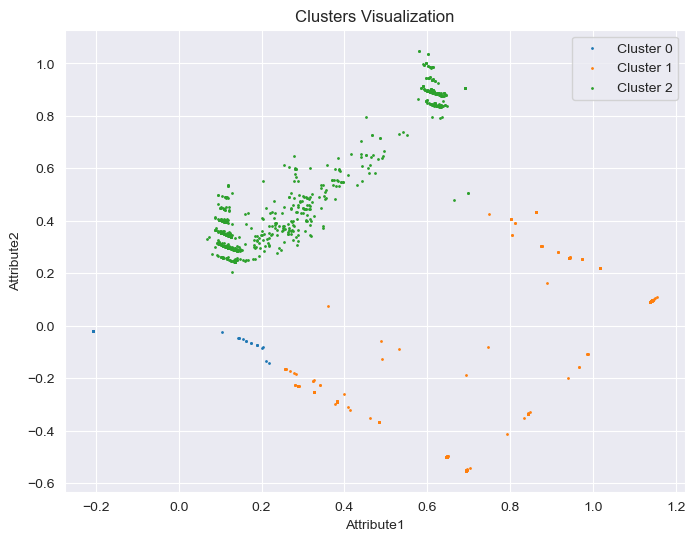

In [201]:
import matplotlib.pyplot as plt

# Assuming df_nodes is your DataFrame with cluster labels

# Plot the clusters in a scatter plot
plt.figure(figsize=(8, 6))

# Iterate over unique cluster labels
for cluster_label in df_2d['Cluster'].unique():
    # Filter the DataFrame for nodes in the current cluster
    df_cluster = df_2d[df_2d['Cluster'] == cluster_label]
    # Plot the nodes in the cluster
    plt.scatter(df_cluster["Component 1"], df_cluster["Component 2"], s=1, label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Attribute1')
plt.ylabel('Attribute2')
plt.title('Clusters Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


In [202]:
radar_df = df_nodes_norm.copy()
features = radar_df[metrics_names]
for feature in features:
    radar_df[feature] = (radar_df[feature] >= 0.5).astype(int)

radar_df

,eigencentrality,popularity,name,followers,genres,eccentricity,harmonicclosnesscentrality,degree,triangles,clustering,modularity_class,closnesscentrality,weighted degree,betweenesscentrality,Spotify ID,Cluster
0,0,62.0,Dr. Hook,197908.0,"['bubblegum pop', 'classic rock', 'classic uk ...",0,0.000000,0,0,0,0,0,0,0,2Mhi3jfuRSdbVZPdjqsnnN,0
1,0,0.0,"Johnny Rodriguez, Johnny Russell",7.0,[],0,0.000000,0,0,0,1,0,0,0,4QFbv1d0BbQANO95hIQaZl,0
2,0,35.0,Bill Smith,120.0,[],0,0.833333,0,1,1,3583,1,0,0,4Omy5P9r7PiXYje9h4jMkz,1
3,0,20.0,Cool Breeze,3321.0,[],1,0.180073,0,3,1,4549,0,0,0,5vZr4eKCIxujg3mPZaHGcS,2
4,0,13.0,The Clique,449.0,['freakbeat'],0,0.000000,0,0,0,2,0,0,0,1TYZpmNJCpmN38laFCVkCm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019,0,10.0,Navy Gravy,209.0,[],0,0.000000,0,0,0,4748,0,0,0,5QEZ8qPZSxIvzrkJCxlsn7,0
6020,0,58.0,Sweet Little Band,20088.0,['musica para ninos'],0,0.000000,0,0,0,4749,0,0,0,7HBA3bLuJTLRvjK8NX9ZSy,0
6021,0,38.0,Chico DeBarge,60121.0,"['neo soul', 'new jack swing', 'r&b', 'urban c...",0,0.000000,0,0,0,4750,0,0,0,67ISVBZzcCTTKM17Ps00sx,0
6022,0,NaN,NaN,NaN,NaN,0,1.000000,0,1,1,4751,1,0,0,10aVNpUB6sPjYjunSIIeq5,1


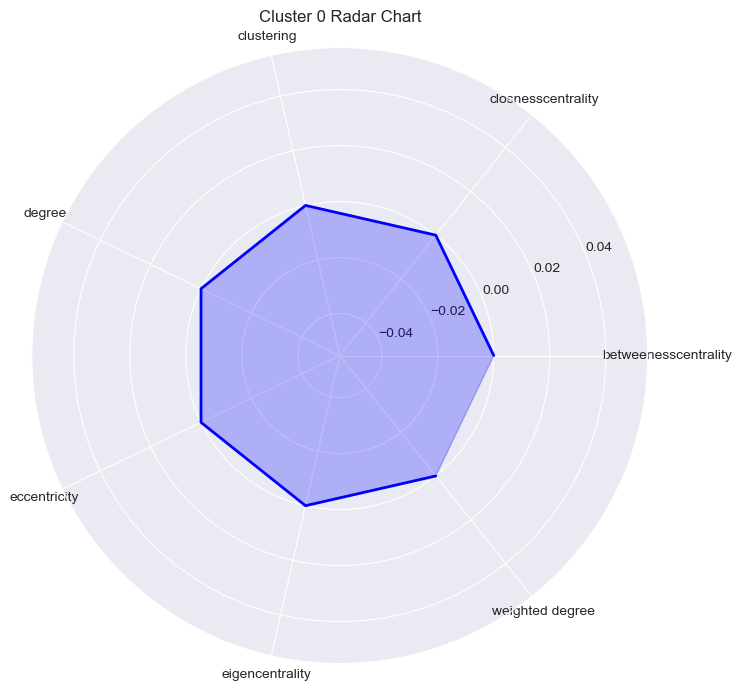

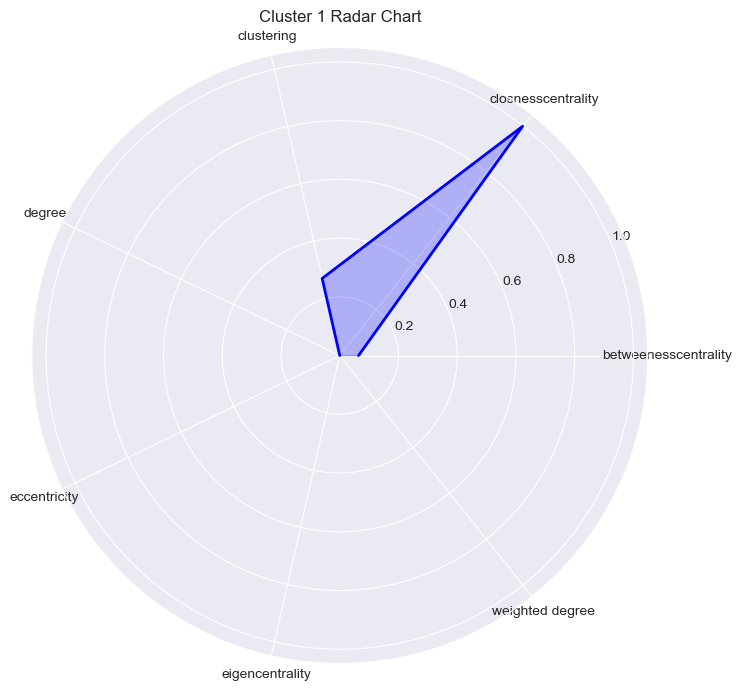

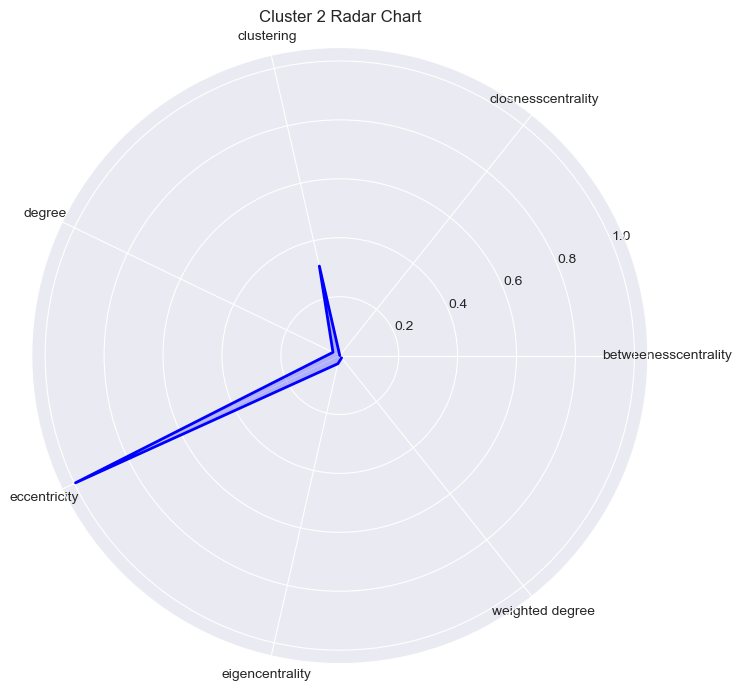

In [203]:
import numpy as np
import matplotlib.pyplot as plt

#for radar charts values to 1 if 0.5 or higher, rest to 0?
#######Profiles?##########

# Define the attributes for the radar chart
attributes = radar_df[metrics_names].columns.tolist()

# Define the theta values (angles) for each attribute
theta = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False)

# Iterate over each unique cluster label
for cluster_label in radar_df['Cluster'].unique():
    # Create a figure and add a subplot with polar projection for each cluster
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Filter the DataFrame for the current cluster
    cluster_data = radar_df[radar_df['Cluster'] == cluster_label]

    # Get attribute values for the current cluster
    values = cluster_data[metrics_names].mean(axis=0).tolist()

    # Repeat the first value to close the plot
    #values += values[:1]

    # Plot the radar chart
    ax.fill(theta, values, color='blue', alpha=0.25)
    ax.plot(theta, values, color='blue', linewidth=2)

    # Set the labels for each attribute
    ax.set_xticks(theta)
    ax.set_xticklabels(attributes)

    # Set the title for the radar chart
    ax.set_title(f'Cluster {cluster_label} Radar Chart')

    # Show plot
    plt.show()


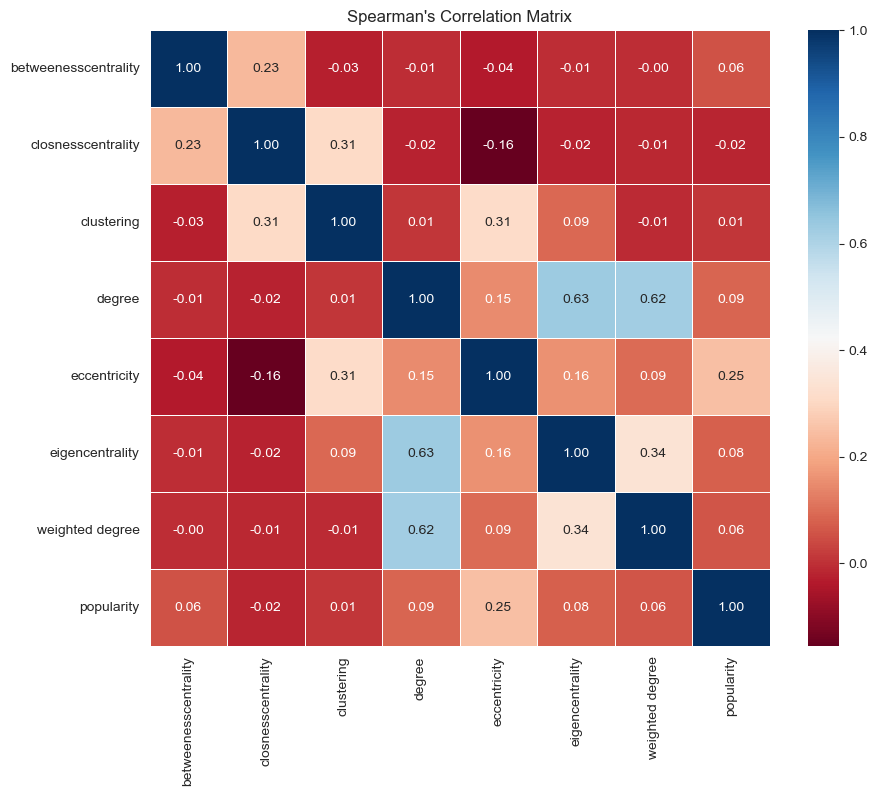

In [204]:
import seaborn as sns

# Compute Spearman's correlation matrix
corr_matrix = radar_df[columns].corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman's Correlation Matrix")
plt.show()


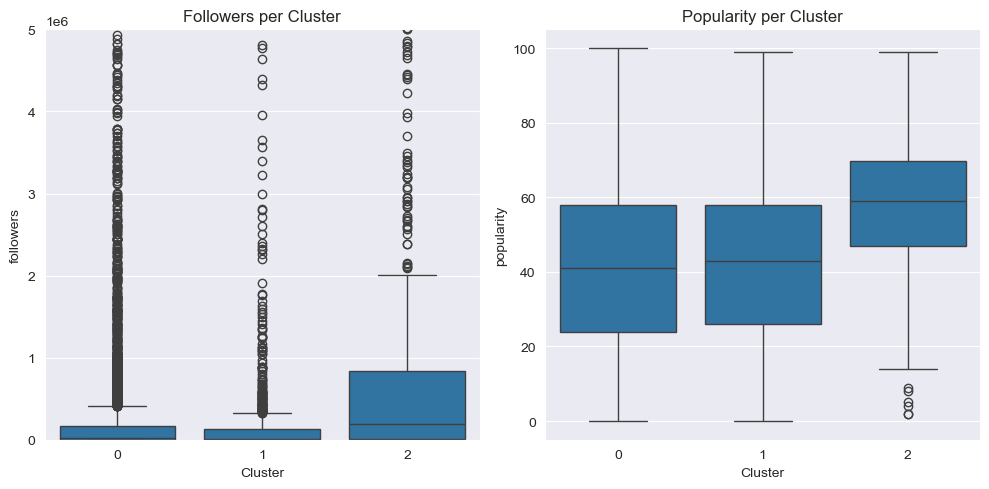

In [205]:
# Plot boxplots for followers and popularity per cluster
plt.figure(figsize=(10, 5))

# Boxplot for followers per cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='followers', data=df_nodes)
plt.ylim(0, 5000000)
plt.title('Followers per Cluster')

# Boxplot for popularity per cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='popularity', data=df_nodes)
plt.title('Popularity per Cluster')

plt.tight_layout()
plt.show()